# IMDB 영화 리뷰 감성 분류

- 1. IMDB 리뷰 데이터에 대한 이해

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [61]:
max_len = 5000

In [62]:
(X_train, y_train), (X_test_data, y_test_data) = imdb.load_data(num_words=max_len)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [63]:
# 첫번쨰 영화리뷰 확인
print(X_train[0])
print(y_test_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
0


In [64]:
index_to_word = {}
for key, value in imdb.get_word_index().items():
    index_to_word[value] = key
len(index_to_word)

88584

In [65]:
# 첫번쨰 영화 리뷰 복원
print(' '.join([index_to_word[s] for s in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s and with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script t

In [66]:
unique_elements, counts_elements = \
    np.unique(y_test_data, return_counts=True)
print("각 레이블에 대한 빈도수:")
label_cnt=dict(zip(unique_elements, counts_elements))
print(label_cnt)

각 레이블에 대한 빈도수:
{0: 12500, 1: 12500}


## LSTM으로 로이터 뉴스 분류
- 모든 단어
- 모든 문장

In [67]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [68]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test_data = pad_sequences(X_test_data, maxlen=max_len)

In [69]:
# one-hot-incoding
Y_train = to_categorical(y_train)
Y_test_data = to_categorical(y_test_data)

In [70]:
X_train.shape, Y_train.shape

((25000, 5000), (25000, 2))

In [71]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [72]:
from sklearn.model_selection import train_test_split
X_test0, X_test1, y_test0, y_test1 =  train_test_split(
    X_test_data,Y_test_data,stratify = Y_test_data,random_state = 2021, test_size=.4
)

In [73]:
category = np.max(y_train) + 1
print(f'{category} 카테고리')
print(f'{len(X_train)} 학습용 영화리뷰')
print(f'{len(X_test1)} 검증용 영화리뷰')
print(f'{len(X_test0)} 테스트용 영화리뷰')

2 카테고리
25000 학습용 영화리뷰
10000 검증용 영화리뷰
15000 테스트용 영화리뷰


In [74]:
X_train.shape,X_test0.shape, X_test1.shape, y_test0.shape, y_test1.shape

((25000, 5000), (15000, 5000), (10000, 5000), (15000, 2), (10000, 2))

In [75]:
# LSTM 모델
model = Sequential([
                    Embedding(5000, 120),
                    LSTM(120),
                    Dense(2,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 120)         600000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 242       
Total params: 715,922
Trainable params: 715,922
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Callback 함수 정의 - Best model, Early stopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('model/reuter_best_model.h5', 
                    verbose=2, save_best_only=True)

In [77]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
X_train.shape, Y_train.shape

((25000, 5000), (25000, 2))

In [79]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=50,
                    validation_data = (X_test1,y_test1), verbose=1,
                    callbacks=[mc,es]
                    )

Epoch 1/50
250/250 [==============================] - 125s 495ms/step - loss: 0.5701 - accuracy: 0.6897 - val_loss: 0.3245 - val_accuracy: 0.8654

Epoch 00001: val_loss improved from inf to 0.32445, saving model to model/reuter_best_model.h5
Epoch 2/50
250/250 [==============================] - 123s 492ms/step - loss: 0.3123 - accuracy: 0.8733 - val_loss: 0.3136 - val_accuracy: 0.8669

Epoch 00002: val_loss improved from 0.32445 to 0.31362, saving model to model/reuter_best_model.h5
Epoch 3/50
250/250 [==============================] - 123s 492ms/step - loss: 0.2283 - accuracy: 0.9101 - val_loss: 0.3178 - val_accuracy: 0.8671

Epoch 00003: val_loss did not improve from 0.31362
Epoch 4/50
250/250 [==============================] - 123s 492ms/step - loss: 0.1978 - accuracy: 0.9239 - val_loss: 0.3193 - val_accuracy: 0.8738

Epoch 00004: val_loss did not improve from 0.31362
Epoch 5/50
250/250 [==============================] - 123s 492ms/step - loss: 0.2320 - accuracy: 0.9086 - val_loss: 

In [80]:
# Best Model 선택
del model
model = load_model('model/reuter_best_model.h5')

In [81]:
print(f"\n 테스트 정확도: {model.evaluate(X_test0, y_test0, verbose=2)}")

469/469 - 42s - loss: 0.3096 - accuracy: 0.8689

 테스트 정확도: [0.30956995487213135, 0.8689333200454712]


In [82]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

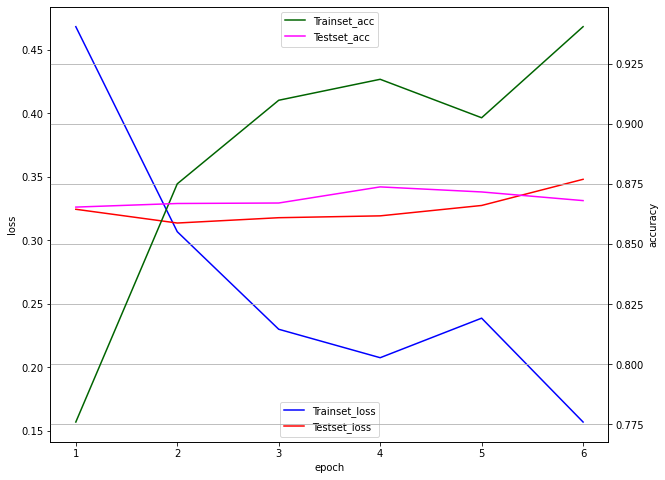

In [83]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center')
ax1.legend(loc='upper center')
plt.grid()
plt.show()